<a href="https://colab.research.google.com/github/mviganalk/Qwork_jobdbSQL/blob/main/Qwork_Data_Analyst_Recruitment_Test_Mohammad_Vigan_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Problem
You are working for a reputable multinational company of KuWork that involved in supplying workforce in the labour market. You have identified that one of the highest demanded position in the job market is the **Marketing Executive** position. In order for your company to keep ahead of the competition, as Data Analyst, you are tasked to analyze the job position.
The company proposed a plan to **identify the job responsibilities and tasks**, **then transform them into gig jobs**. Keep in mind that not all of the reponsibilities are viable to be a gig job. To compensate for the job, you also need to **identify the fair salary range for the job position according to its experience level and country**.

To support this plan, the Business Intelligence team has managed to collect job posting data from various sources. The team stored the data into an SQL database (you can find it in jobdb.sqlite), however their cleaning steps are very limited and left a lot of room for improvement. The team also managed to gather hundreds samples of Marketing Executive from job descriptions to help you (you can find it in responsibilities.csv).

Facing this challenge, you are required to:

1) Discover the fair salary range,

2) List out possible gigs from the job,

3) Present your finding.

#Install packages gdown and pandas

In [ ]:
!pip install gdown

In [ ]:
pip install pandas

In [ ]:
import gdown
import pandas as pd # Load tabel/CSV/Excel/GSheet...
import numpy as np # Numpy array


In [ ]:
url = "https://drive.google.com/file/d/1sTmABdx2BZ9wy4w-V6xCxbDWq2fAT-RY/view?usp=sharing"
output = 'jobdb_main.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1sTmABdx2BZ9wy4w-V6xCxbDWq2fAT-RY
To: /content/jobdb_main.csv
100%|██████████| 79.6M/79.6M [00:00<00:00, 101MB/s] 


'jobdb_main.csv'

In [ ]:
url = "https://drive.google.com/file/d/1O1CU1mEezwqUDKo7Hb9l2BVBVbuHEzaF/view?usp=sharing"
output = 'responsibilities.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1O1CU1mEezwqUDKo7Hb9l2BVBVbuHEzaF
To: /content/responsibilities.csv
100%|██████████| 149k/149k [00:00<00:00, 33.1MB/s]


'responsibilities.csv'

#Importing Database


##Importing responsibilities table

In [ ]:
# To import data from CSV file, we can use `pd.read_csv('filename.csv')` function
# Let's import it and store it as "df" variable
# df_respon
df_respon = pd.read_csv('/content/responsibilities.csv')
df_respon

,Unnamed: 0,responsibility
0,0,Design and influence a PR strategy and SMART P...
1,1,Ensure consistent and relevant customer commun...
2,2,"Research, write press releases and ensure that..."
3,3,Maintain relationships with influential lifest...
4,4,Manage photo shoots within the hotel for fashi...
...,...,...
1820,1820,"Plan, manage and execute campaigns focused on ..."
1821,1821,Responsible for maintaining and updating the c...
1822,1822,Prepare and upload product listing including c...
1823,1823,Receive and respond to E-commerce customer inq...


##Importing jobdb_main table

In [ ]:
# To import data from CSV file, we can use `pd.read_csv('filename.csv')` function
# Let's import it and store it as "df" variable
# df_jobdb
df_jobdb = pd.read_csv('/content/jobdb_main.csv')
df_jobdb

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,...,last_seen,date_expired,scrapedid.1,category,scrapedid.2,location,scrapedid.3,requirement,scrapedid.4,type
0,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,advanced/higher/graduate diploma,911238,full-time
1,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,bachelor's degree,911238,full-time
2,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,diploma,911238,full-time
3,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,higher secondary/stpm/'a' level/pre-u,911238,full-time
4,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,post graduate diploma,911238,full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243660,1024322,1,32,2023-01-18 07:35:01.986852,Market Research Specialist/ Executive (MNC/ Up...,2023-01-09 10:23:24.000000,Junior Executive,2.0,NaN,SGD,...,2023-02-06 02:12:23.018958,NaN,1024322,marketing/business dev,1024322,singapore,1024322,professional degree,1024322,full-time
243661,2622625,2,315303,2023-05-30 00:00:14.631434,Marketing Executive,2023-05-28 20:19:14.000000,Not Specified,NaN,NaN,MYR,...,2023-06-24 01:47:23.734786,NaN,2622625,marketing/business dev,2622625,sibu,2622625,not specified,2622625,full-time
243662,2622625,2,315303,2023-05-30 00:00:14.631434,Marketing Executive,2023-05-28 20:19:14.000000,Not Specified,NaN,NaN,MYR,...,2023-06-24 01:47:23.734786,NaN,2622625,sales/marketing,2622625,sibu,2622625,not specified,2622625,full-time
243663,333340,2,57297,2022-08-08 00:00:15.027012,Digital Marketing Executive,2022-08-07 15:03:35.000000,Not Specified,NaN,NaN,MYR,...,2022-08-08 00:00:15.027012,NaN,333340,sales/marketing,333340,perai,333340,not specified,333340,contract


#Data cleaning preparation

##Check information all dataset

In [ ]:
#df info
df_jobdb.info()
df_respon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243665 entries, 0 to 243664
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   scrapedid            243665 non-null  int64  
 1   webid                243665 non-null  int64  
 2   companyid            243665 non-null  int64  
 3   date_scraped         243665 non-null  object 
 4   job_title            243665 non-null  object 
 5   date_posted          243665 non-null  object 
 6   career_level         240559 non-null  object 
 7   year_experience_min  187118 non-null  float64
 8   year_experience_max  267 non-null     float64
 9   currency             243302 non-null  object 
 10  salary_min           121147 non-null  float64
 11  salary_max           121194 non-null  float64
 12  remote               211 non-null     float64
 13  source               0 non-null       float64
 14  last_seen            243665 non-null  object 
 15  date_expired     

Steps to do :
* Unique Values (Remove irrelevant values)
* Treating missing values (state the reasoning)
* Outliers ()
* Check Duplicates, retain only the first record
* Check data & convert data types
* Check typos
* Check time series data

## Check  Dataset jobdb_main

In [ ]:
#Make a copy of the original data for data cleaning
df_jobdbc = df_jobdb.copy()

In [ ]:
df_jobdbc.head() #Showing 5 data records

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,year_experience_max,currency,...,last_seen,date_expired,scrapedid.1,category,scrapedid.2,location,scrapedid.3,requirement,scrapedid.4,type
0,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,advanced/higher/graduate diploma,911238,full-time
1,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,bachelor's degree,911238,full-time
2,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,diploma,911238,full-time
3,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,higher secondary/stpm/'a' level/pre-u,911238,full-time
4,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,NaN,MYR,...,2023-02-02 00:14:45.867315,NaN,911238,sales/marketing,911238,kuala lumpur,911238,post graduate diploma,911238,full-time


In [ ]:
df_jobdbc.shape #Check how much column and rows

(243665, 24)

In [ ]:
df_jobdbc.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243665 entries, 0 to 243664
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   scrapedid            243665 non-null  int64  
 1   webid                243665 non-null  int64  
 2   companyid            243665 non-null  int64  
 3   date_scraped         243665 non-null  object 
 4   job_title            243665 non-null  object 
 5   date_posted          243665 non-null  object 
 6   career_level         240559 non-null  object 
 7   year_experience_min  187118 non-null  float64
 8   year_experience_max  267 non-null     float64
 9   currency             243302 non-null  object 
 10  salary_min           121147 non-null  float64
 11  salary_max           121194 non-null  float64
 12  remote               211 non-null     float64
 13  source               0 non-null       float64
 14  last_seen            243665 non-null  object 
 15  date_expired     

In [ ]:
df_jobdbc.isnull().sum() #Check how much null values exist

scrapedid                   0
webid                       0
companyid                   0
date_scraped                0
job_title                   0
date_posted                 0
career_level             3106
year_experience_min     56547
year_experience_max    243398
currency                  363
salary_min             122518
salary_max             122471
remote                 243454
source                 243665
last_seen                   0
date_expired           243665
scrapedid.1                 0
category                    0
scrapedid.2                 0
location                    0
scrapedid.3                 0
requirement                38
scrapedid.4                 0
type                     2747
dtype: int64

#Data Cleaning
Steps to do :
* Unique Values (Remove irrelevant values)
* Remove column most the null values
* Treating missing values (state the reasoning)
* Check Duplicates, retain only the first record
* Check data & convert data types


In [ ]:
df_jobdbclean=df_jobdbc.copy()

##Remove irrelevant column

In [ ]:
#Drop scrapedid.1 , scrapedid.2 , scrapedid.3 , scrapedid.4 columns
df_jobdbclean.drop(columns = 'scrapedid.1', inplace = True)
df_jobdbclean.drop(columns = 'scrapedid.2', inplace = True)
df_jobdbclean.drop(columns = 'scrapedid.3', inplace = True)
df_jobdbclean.drop(columns = 'scrapedid.4', inplace = True)

##Remove column most the null values

In [ ]:
# Drop remote columns
df_jobdbclean.drop(columns = 'remote', inplace = True)
# Drop source columns
df_jobdbclean.drop(columns = 'source', inplace = True)
# Drop year_experience_max columns
df_jobdbclean.drop(columns = 'year_experience_max', inplace = True)
# Drop date_expired columns
df_jobdbclean.drop(columns = 'date_expired', inplace = True)

In [ ]:
df_jobdbclean.head(5)

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,currency,salary_min,salary_max,last_seen,category,location,requirement,type
0,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,advanced/higher/graduate diploma,full-time
1,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,bachelor's degree,full-time
2,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,diploma,full-time
3,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,higher secondary/stpm/'a' level/pre-u,full-time
4,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,post graduate diploma,full-time


In [ ]:
df_jobdbclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243665 entries, 0 to 243664
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   scrapedid            243665 non-null  int64  
 1   webid                243665 non-null  int64  
 2   companyid            243665 non-null  int64  
 3   date_scraped         243665 non-null  object 
 4   job_title            243665 non-null  object 
 5   date_posted          243665 non-null  object 
 6   career_level         240559 non-null  object 
 7   year_experience_min  187118 non-null  float64
 8   currency             243302 non-null  object 
 9   salary_min           121147 non-null  float64
 10  salary_max           121194 non-null  float64
 11  last_seen            243665 non-null  object 
 12  category             243665 non-null  object 
 13  location             243665 non-null  object 
 14  requirement          243627 non-null  object 
 15  type             

## Handle the duplicate database

In [ ]:
#Check the duplicate
df_jobdbclean[df_jobdbclean['scrapedid'].duplicated()]

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,currency,salary_min,salary_max,last_seen,category,location,requirement,type
1,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,bachelor's degree,full-time
2,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,diploma,full-time
3,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,higher secondary/stpm/'a' level/pre-u,full-time
4,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,post graduate diploma,full-time
5,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,professional degree,full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243658,1024322,1,32,2023-01-18 07:35:01.986852,Market Research Specialist/ Executive (MNC/ Up...,2023-01-09 10:23:24.000000,Junior Executive,2.0,SGD,3000.0,4500.0,2023-02-06 02:12:23.018958,marketing/business dev,singapore,master's degree,full-time
243659,1024322,1,32,2023-01-18 07:35:01.986852,Market Research Specialist/ Executive (MNC/ Up...,2023-01-09 10:23:24.000000,Junior Executive,2.0,SGD,3000.0,4500.0,2023-02-06 02:12:23.018958,marketing/business dev,singapore,post graduate diploma,full-time
243660,1024322,1,32,2023-01-18 07:35:01.986852,Market Research Specialist/ Executive (MNC/ Up...,2023-01-09 10:23:24.000000,Junior Executive,2.0,SGD,3000.0,4500.0,2023-02-06 02:12:23.018958,marketing/business dev,singapore,professional degree,full-time
243662,2622625,2,315303,2023-05-30 00:00:14.631434,Marketing Executive,2023-05-28 20:19:14.000000,Not Specified,NaN,MYR,NaN,NaN,2023-06-24 01:47:23.734786,sales/marketing,sibu,not specified,full-time


It is showing that duplicate data are exist, so we need to remove it based on the id since 1 id in user should be only 1 per id.

In [ ]:
#Exclude the duplicate
df_jobdbclean.drop_duplicates('scrapedid',keep = 'first',inplace = True)

df_jobdbclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45368 entries, 0 to 243663
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scrapedid            45368 non-null  int64  
 1   webid                45368 non-null  int64  
 2   companyid            45368 non-null  int64  
 3   date_scraped         45368 non-null  object 
 4   job_title            45368 non-null  object 
 5   date_posted          45368 non-null  object 
 6   career_level         42262 non-null  object 
 7   year_experience_min  25286 non-null  float64
 8   currency             45128 non-null  object 
 9   salary_min           18191 non-null  float64
 10  salary_max           18238 non-null  float64
 11  last_seen            45368 non-null  object 
 12  category             45368 non-null  object 
 13  location             45368 non-null  object 
 14  requirement          45354 non-null  object 
 15  type                 44000 non-null

## Handle missing values

In [ ]:
# Handle missing values career_level column with Not Specified
df_jobdbclean['career_level'].fillna("Not Specified",inplace = True)
# Handle missing values year_experience_min column with 0
df_jobdbclean['year_experience_min'].fillna("0",inplace = True)
# Handle missing values currency column with 0
df_jobdbclean['currency'].fillna("0",inplace = True)
# Handle missing values salary_min column with 0
df_jobdbclean['salary_min'].fillna(0, inplace = True)
# Handle missing values salary_max column with 0
df_jobdbclean['salary_max'].fillna(0, inplace = True)
# Handle missing values requirement column with not specified
df_jobdbclean['requirement'].fillna("not specified", inplace = True)
# Handle missing values type column with unknown
df_jobdbclean['type'].fillna("unknown", inplace = True)

In [ ]:
#Then we confirm the data after fill the null values
df_jobdbclean.isna().sum()

scrapedid              0
webid                  0
companyid              0
date_scraped           0
job_title              0
date_posted            0
career_level           0
year_experience_min    0
currency               0
salary_min             0
salary_max             0
last_seen              0
category               0
location               0
requirement            0
type                   0
dtype: int64

In [ ]:
df_jobdbclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45368 entries, 0 to 243663
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scrapedid            45368 non-null  int64  
 1   webid                45368 non-null  int64  
 2   companyid            45368 non-null  int64  
 3   date_scraped         45368 non-null  object 
 4   job_title            45368 non-null  object 
 5   date_posted          45368 non-null  object 
 6   career_level         45368 non-null  object 
 7   year_experience_min  45368 non-null  object 
 8   currency             45368 non-null  object 
 9   salary_min           45368 non-null  float64
 10  salary_max           45368 non-null  float64
 11  last_seen            45368 non-null  object 
 12  category             45368 non-null  object 
 13  location             45368 non-null  object 
 14  requirement          45368 non-null  object 
 15  type                 45368 non-null

In [ ]:
df_jobdbclean.head(3)

,scrapedid,webid,companyid,date_scraped,job_title,date_posted,career_level,year_experience_min,currency,salary_min,salary_max,last_seen,category,location,requirement,type
0,911238,2,196469,2023-01-18 01:31:47.799570,Performance Marketing Executive,2023-01-12 19:00:51.000000,Junior Executive,2.0,MYR,3000.0,4000.0,2023-02-02 00:14:45.867315,sales/marketing,kuala lumpur,advanced/higher/graduate diploma,full-time
12,6844,2,6597,2022-03-29 11:03:31.463055,市场行销人员 SALES & MARKETING EXECUTIVE (PART-TIME/...,2022-03-10 19:30:56.000000,Entry Level,1.0,MYR,4000.0,5600.0,2022-03-29 11:03:31.463055,sales/marketing,kuala lumpur,advanced/higher/graduate diploma,full-time
24,1615240,1,379,2023-03-06 20:19:05.696398,Marketing Executive (A & P),2023-02-23 07:35:07.000000,Junior Executive,5.0,SGD,3000.0,4200.0,2023-03-24 04:14:00.207080,advertising,rochor,advanced/higher/graduate diploma,full-time


## Change Datatype

In [ ]:
#Change datatype date_scraped to datetime
df_jobdbclean['date_scraped'] = pd.to_datetime(df_jobdbclean['date_scraped'], format='%Y-%m-%d')
#Change datatype date_posted to datetime
df_jobdbclean['date_posted'] = pd.to_datetime(df_jobdbclean['date_posted'], format='%Y-%m-%d')
#Change datatype last_seen to datetime
df_jobdbclean['last_seen'] = pd.to_datetime(df_jobdbclean['last_seen'], format='%Y-%m-%d')

In [ ]:
df_jobdbclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45368 entries, 0 to 243663
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   scrapedid            45368 non-null  int64         
 1   webid                45368 non-null  int64         
 2   companyid            45368 non-null  int64         
 3   date_scraped         45368 non-null  datetime64[ns]
 4   job_title            45368 non-null  object        
 5   date_posted          45368 non-null  datetime64[ns]
 6   career_level         45368 non-null  object        
 7   year_experience_min  45368 non-null  object        
 8   currency             45368 non-null  object        
 9   salary_min           45368 non-null  float64       
 10  salary_max           45368 non-null  float64       
 11  last_seen            45368 non-null  datetime64[ns]
 12  category             45368 non-null  object        
 13  location             45368 non

In [ ]:
#Change datatype year_experience_min to integer
df_jobdbclean['year_experience_min'] = df_jobdbclean['year_experience_min'].astype(int)

In [ ]:
df_jobdbclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45368 entries, 0 to 243663
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   scrapedid            45368 non-null  int64         
 1   webid                45368 non-null  int64         
 2   companyid            45368 non-null  int64         
 3   date_scraped         45368 non-null  datetime64[ns]
 4   job_title            45368 non-null  object        
 5   date_posted          45368 non-null  datetime64[ns]
 6   career_level         45368 non-null  object        
 7   year_experience_min  45368 non-null  int64         
 8   currency             45368 non-null  object        
 9   salary_min           45368 non-null  float64       
 10  salary_max           45368 non-null  float64       
 11  last_seen            45368 non-null  datetime64[ns]
 12  category             45368 non-null  object        
 13  location             45368 non

In [ ]:
df_respon.info()
df_respon.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1825 non-null   int64 
 1   responsibility  1825 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.6+ KB


,Unnamed: 0,responsibility
0,0,Design and influence a PR strategy and SMART P...
1,1,Ensure consistent and relevant customer commun...


#Exlporatory Data Analysis

In [ ]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(df_jobdbclean.describe())


          scrapedid         webid      companyid  year_experience_min  \
count  4.536800e+04  45368.000000   45368.000000         45368.000000   
mean   1.725108e+06      3.360364  100629.993189             1.257935   
std    1.386738e+06      5.705530  125881.210094             1.585456   
min    1.600000e+01      1.000000       1.000000             0.000000   
25%    2.111525e+05      1.000000    5995.250000             0.000000   
50%    1.616533e+06      2.000000   39278.000000             1.000000   
75%    2.967287e+06      2.000000  195659.000000             2.000000   
max    4.268743e+06     24.000000  483369.000000            20.000000   

         salary_min    salary_max  
count  4.536800e+04  4.536800e+04  
mean   1.262411e+05  1.895825e+05  
std    9.095345e+05  1.359363e+06  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.800000e+03  3.800000e+03  
max    4.500000e+07  5.000000e+07  


In [ ]:
# Distribution of job titles
print(df_jobdbclean['job_title'].value_counts())

Marketing Executive                                                    7195
Digital Marketing Executive                                            3351
Sales & Marketing Executive                                            1782
MARKETING EXECUTIVE                                                    1312
Senior Marketing Executive                                              838
                                                                       ... 
External Audit Senior                                                     1
Creative Ops Executive-Overseas Market                                    1
Marketing Senior Executive (West, Up to $3500, 6 months extendable)       1
Marketing Communications Executive / Assistant (Woodlands)                1
JUNIOR EXECUTIVE - SALES & MARKETING                                      1
Name: job_title, Length: 14314, dtype: int64


In [ ]:
# Distribution of experience levels
print(df_jobdbclean['career_level'].value_counts())

Not Specified                              17027
Junior Executive                           13964
Senior Executive                            6558
Staff (non-management & non-supervisor)     2780
Entry Level                                 2273
Supervisor/Coordinator                       637
Manager                                      590
Non-Executive                                456
Manager/Assistant Manager                    258
Executive                                    207
Senior Manager                               200
Less than 1 year experience                  186
Entry Level / Junior, Apprentice             105
Associate / Supervisor                        70
Mid-Senior Level / Manager                    33
CEO/GM/Director/Senior Manager                21
Internship / OJT                               2
Director / Executive                           1
Name: career_level, dtype: int64


In [ ]:
# Distribution of location
print(df_jobdbclean['location'].value_counts())

kuala lumpur                                  5531
singapore                                     4782
central                                       3494
petaling jaya                                 1979
selangor                                      1975
                                              ... 
MY_MLK_alor_gajah, MY_MLK                        1
taguig, philippines, ncr                         1
Kampar, Perak                                    1
navotas, philippines, metro manila               1
bandung, indonesia, west java (jawa barat)       1
Name: location, Length: 576, dtype: int64


In [ ]:
# Distribution of category
print(df_jobdbclean['category'].value_counts())

sales/marketing                    16440
marketing/business dev             10200
digital marketing                   2219
computer/information technology     1583
audit & taxation                    1245
                                   ...  
safety and security                    1
Residential care activities            1
geology/geophysics                     1
media and creatives                    1
architecture and engineering           1
Name: category, Length: 178, dtype: int64


In [ ]:
# Distribution of requirement
print(df_jobdbclean['requirement'].value_counts())

not specified                                                                                                                                                                          19555
advanced/higher/graduate diploma                                                                                                                                                       12811
bachelor's degree                                                                                                                                                                       7307
diploma / advanced diploma / higher graduate diploma / dvm / dkm level 4 / dlkm level 5                                                                                                 1600
adv diploma                                                                                                                                                                             1423
                                                       

In [ ]:
# Distribution of job type
print(df_jobdbclean['type'].value_counts())

full-time         38007
Permanent          2715
contract           2080
unknown            1368
Contract            326
internship          251
part-time           222
full time           205
temporary           120
Internship           34
Part-time            17
Temporary             9
Apprenticeship        3
part time             3
contractual           3
freelance             3
Self-employed         2
Name: type, dtype: int64


In [ ]:
# Load job responsibilities data
df_respon = pd.read_csv('responsibilities.csv')

# Extract unique responsibilities
unique_responsibilities = set(df_respon['responsibility'])

# Determine which responsibilities can be transformed into gig jobs
gig_opportunities = []
for df_respon in unique_responsibilities:
    if df_jobdbclean['job_title'].str.contains('responsibility').any():
        gig_opportunities.append('responsibility')

print("Gig Opportunities:", gig_opportunities)

Gig Opportunities: []


In [ ]:
# Group by experience level and country to analyze salary range
salary_analysis = df_jobdb.groupby(['job_title','career_level', 'location']).agg({'salary_min': 'mean', 'salary_max': 'mean'})

print("Salary Analysis:")
print(salary_analysis)


Salary Analysis:
                                                                                  salary_min  \
job_title                                          career_level     location                   
"#SGUnitedJobs" IT Engineer                        Not Specified    singapore            NaN   
#Digital IT Solution Architect                     Senior Executive singapore            NaN   
$2k-4k | Marketing Executive | Office Hours        Entry Level      singapore         2000.0   
$4000 -$4800 Digital Marketing Executive           Senior Executive east              4000.0   
$4500 / Senior Marketing Executive / Kallang / ... Senior Executive paya lebar        4000.0   
...                                                                                      ...   
社交媒體營銷專員 Social Media Marketing Executive          Senior Executive kuala lumpur      2600.0   
网络平台销售代表 digital marketing executive               Not Specified    kuala lumpur         NaN   
销售与市场营销专员 Sales & Marke

## Find the highest demand job on market "Marketing Executive"

In [ ]:
# Filter by job title "Marketing Executive" and include salary_min, salary_max, and location columns
marketing_executive_data = df_jobdbclean[df_jobdbclean['job_title'].str.contains('Marketing Executive', case=False)][['career_level','year_experience_min','currency', 'salary_min', 'salary_max', 'category','location', 'requirement','type']]

print(marketing_executive_data.value_counts())

career_level            year_experience_min  currency  salary_min  salary_max  category                location      requirement        type     
Not Specified           0                    MYR       0.0         0.0         sales/marketing         kuala lumpur  not specified      full-time    308
                                             SGD       0.0         0.0         sales/marketing         singapore     not specified      full-time    302
                                                                                                       central       not specified      full-time    290
                                                                                                       east          not specified      full-time    272
                                                                               marketing/business dev  central       not specified      full-time    269
                                                                                         

## Find the fair salary range

In [ ]:
# Filter by job title "Marketing Executive"
marketing_executive_salary = df_jobdbclean[df_jobdbclean['job_title'].str.contains('Marketing Executive', case=False)]

# Group by experience level and location to analyze salary range
salary_range = marketing_executive_salary.groupby(['career_level', 'location']).agg({'salary_min': 'mean', 'salary_max': 'mean', 'salary_min': 'min', 'salary_max': 'max'})

# Display the salary analysis
print("salary_range:")
print(salary_range)

salary_range:
                                                                                   salary_min  \
career_level                   location                                                         
Associate / Supervisor         kota jakarta utara, indonesia, daerah khusus ib...         0.0   
                               makati, philippines, metro manila                          0.0   
                               north jakarta, indonesia, dki jakarta                      0.0   
                               south jakarta, indonesia, dki jakarta                      0.0   
CEO/GM/Director/Senior Manager semarang                                                   0.0   
...                                                                                       ...   
Supervisor/Coordinator         sulawesi utara                                             0.0   
                               surabaya                                                   0.0   
                

## Find the List out possible gigs from the job

In [ ]:
# Load the job responsibilities data
responsibilities_data = pd.read_csv('responsibilities.csv')

# Extract unique responsibilities
common_gig_tasks = responsibilities_data['responsibility'].unique()

# Load the job responsibilities data
responsibilities_data = pd.read_csv('responsibilities.csv')

# Extract unique responsibilities
unique_responsibilities = set(responsibilities_data['responsibility'])

# Find possible gigs from job responsibilities
possible_gigs = []
for responsibility in unique_responsibilities:
    for task in common_gig_tasks:
        if responsibility.lower() in task.lower():
            possible_gigs.append(task)

# Remove duplicates and sort
possible_gigs = sorted(set(possible_gigs))

# Display possible gigs
print("Possible Gigs:")
for gig in possible_gigs:
    print(gig)


Possible Gigs:
Abide by policies and procedures established by the Retreat and practices Starwood code of conduct.
Ability to thrive in a dynamic, constantly changing work environment
Able to achieve sales objective set.
Able to conceptualise, develop and execute interesting ideas for marketing projects
Able to construct SEM campaign and measurement
Able to help and resolve any problems in planning and organizing events before and during the event.
Able to provide suggestions to improve events during the post-mortem meetings.
Able to work in the field
Account management and follow up on all business-related activities e.g. AR, AP.
Accountability for brands’ performance
Accountable for social media analytics reports and post mortems resulting in data-driven decision making, testing, and learning
Achieve sales targets
Achieve targeted sales budget and debtors collection
Achieving and maximizing sales for company’s project
Achieving building or property leasing targets and supporting othe

## Present the finding

<ipython-input-98-0a9c8ce9cbc5>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


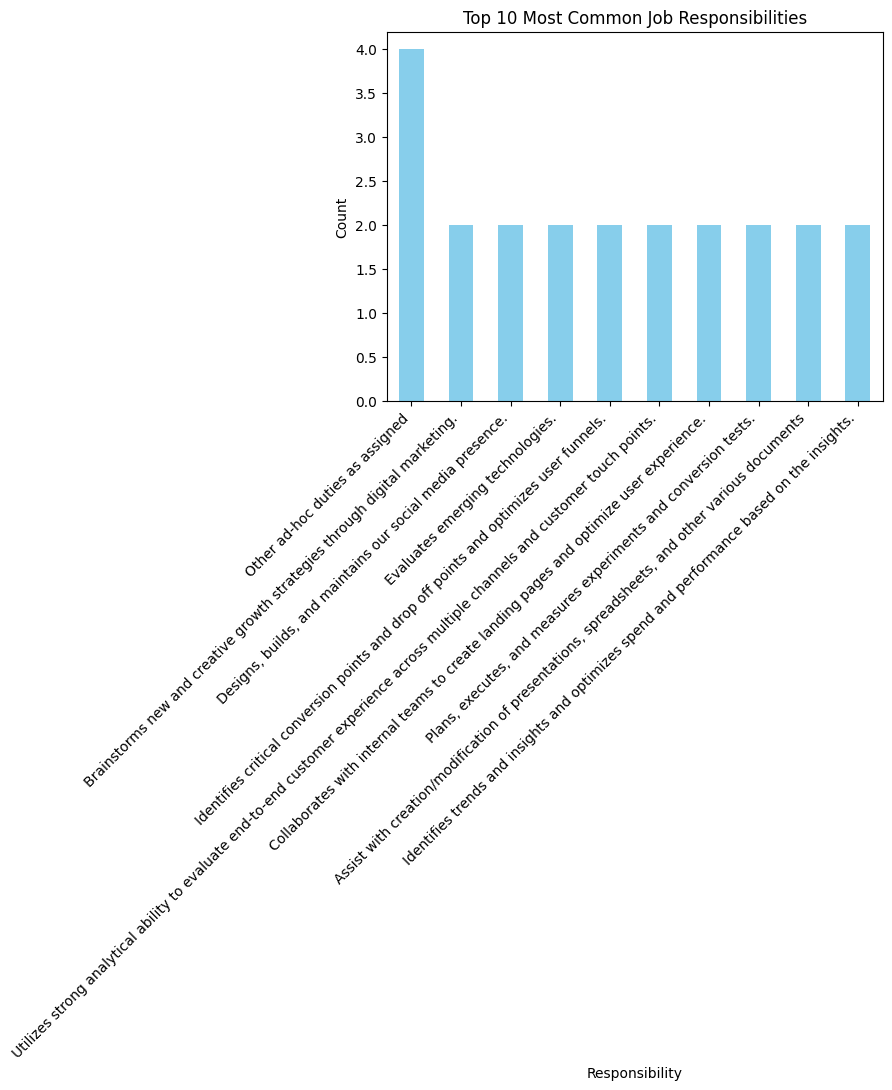

Possible Gigs:
- Design and influence a PR strategy and SMART Plan, aligned with marketing and communication activities across the Hotel and the region.
- Ensure consistent and relevant customer communications within appropriate channels with an aim of establishing market credibility and awareness.
- Research, write press releases and ensure that they reach the target audience.
- Maintain relationships with influential lifestyle media, publications, celebrities, and artists to enhance editorial coverage and support.
- Manage photo shoots within the hotel for fashion, ad, and editorial shoots as well as W-related food/event photography.
- Develop, plan, and manage PR resources according to an agreed budget.
- Produce sales & publicity brochures, collateral, promotional videos, and digital programs to reach the target audience.
- Responsible for organizing press conferences, exhibitions, and press tours.
- Evaluate advertising and promotional programs to ensure alignment with brand passi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the job responsibilities data
responsibilities_data = pd.read_csv('responsibilities.csv')

# Extract unique responsibilities
unique_responsibilities = responsibilities_data['responsibility'].unique()

# Count occurrences of each responsibility
responsibility_counts = responsibilities_data['responsibility'].value_counts()

# Plot the top 10 most common responsibilities
top_10_responsibilities = responsibility_counts.head(10)
top_10_responsibilities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Job Responsibilities')
plt.xlabel('Responsibility')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the list of possible gigs
print("Possible Gigs:")
for responsibility in unique_responsibilities:
    print("- " + responsibility)


Fair Salary Range Analysis for Marketing Executive Position:
----------------------------------------------------------
Based on the analysis of Marketing Executive positions, the following fair salary ranges were identified:
                                                       salary_min  \
career_level                            type                        
Associate / Supervisor                  contractual  0.000000e+00   
                                        full time    0.000000e+00   
CEO/GM/Director/Senior Manager          full-time    0.000000e+00   
Entry Level                             contract     2.293333e+03   
                                        full-time    2.082285e+03   
...                                                           ...   
Staff (non-management & non-supervisor) part-time    1.700000e+06   
                                        temporary    0.000000e+00   
Supervisor/Coordinator                  contract     8.096774e+05   
               

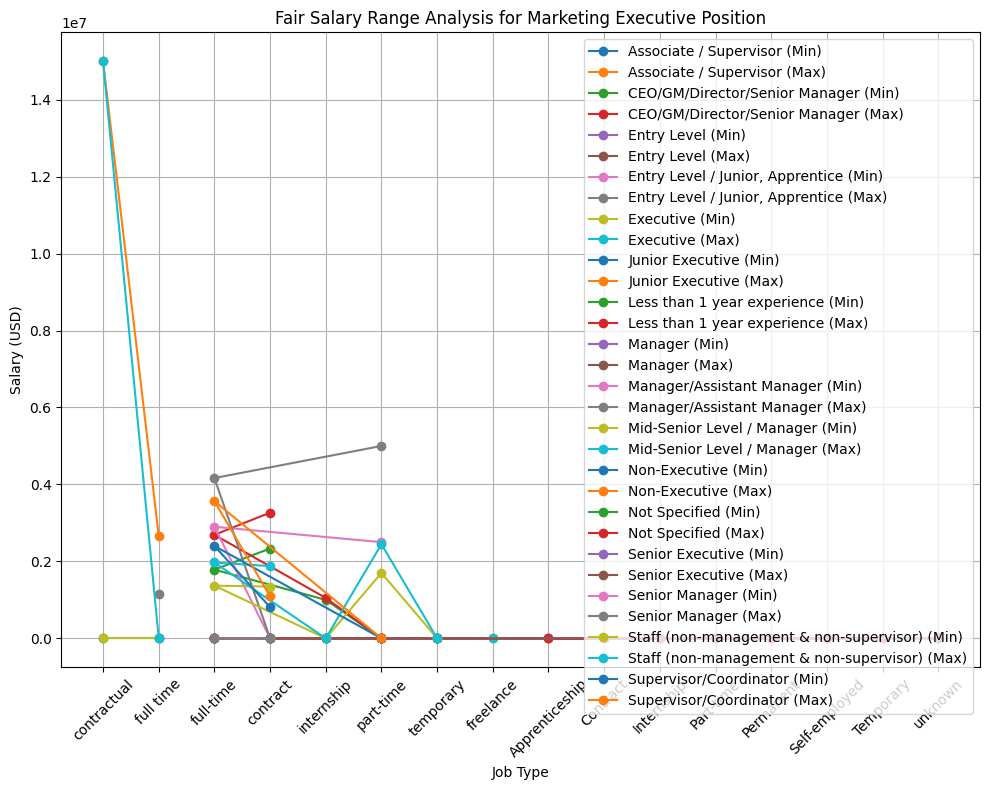

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter by job title "Marketing Executive"
marketing_executive_data = df_jobdbclean[df_jobdbclean['job_title'].str.contains('Marketing Executive', case=False)]

# Group by career level and job type to analyze salary range
salary_analysis_type = marketing_executive_data.groupby(['career_level', 'type']).agg({'salary_min': 'mean', 'salary_max': 'mean'})

# Presenting findings
print("Fair Salary Range Analysis for Marketing Executive Position:")
print("----------------------------------------------------------")
print("Based on the analysis of Marketing Executive positions, the following fair salary ranges were identified:")

# Print summary table
print(salary_analysis_type)

# Plotting salary ranges
plt.figure(figsize=(10, 8))
for index, group in salary_analysis_type.groupby('career_level'):
    plt.plot(group.index.get_level_values('type'), group['salary_min'], marker='o', label=f'{index} (Min)')
    plt.plot(group.index.get_level_values('type'), group['salary_max'], marker='o', label=f'{index} (Max)')
plt.title('Fair Salary Range Analysis for Marketing Executive Position')
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fair Salary Range Analysis for Marketing Executive Position:
----------------------------------------------------------
Based on the analysis of Marketing Executive positions, the following fair salary ranges were identified:
                                                         salary_min  \
career_level                   category                               
Associate / Supervisor         sales and marketing     0.000000e+00   
CEO/GM/Director/Senior Manager marketing/business dev  0.000000e+00   
                               sales/marketing         0.000000e+00   
Entry Level                    accounting/finance      2.500000e+03   
                               admin/human resources   2.666667e+03   
...                                                             ...   
Supervisor/Coordinator         marketing/business dev  2.156962e+06   
                               retail sales            2.383333e+06   
                               sales - corporate       3.250000e

<ipython-input-100-430187c63b78>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


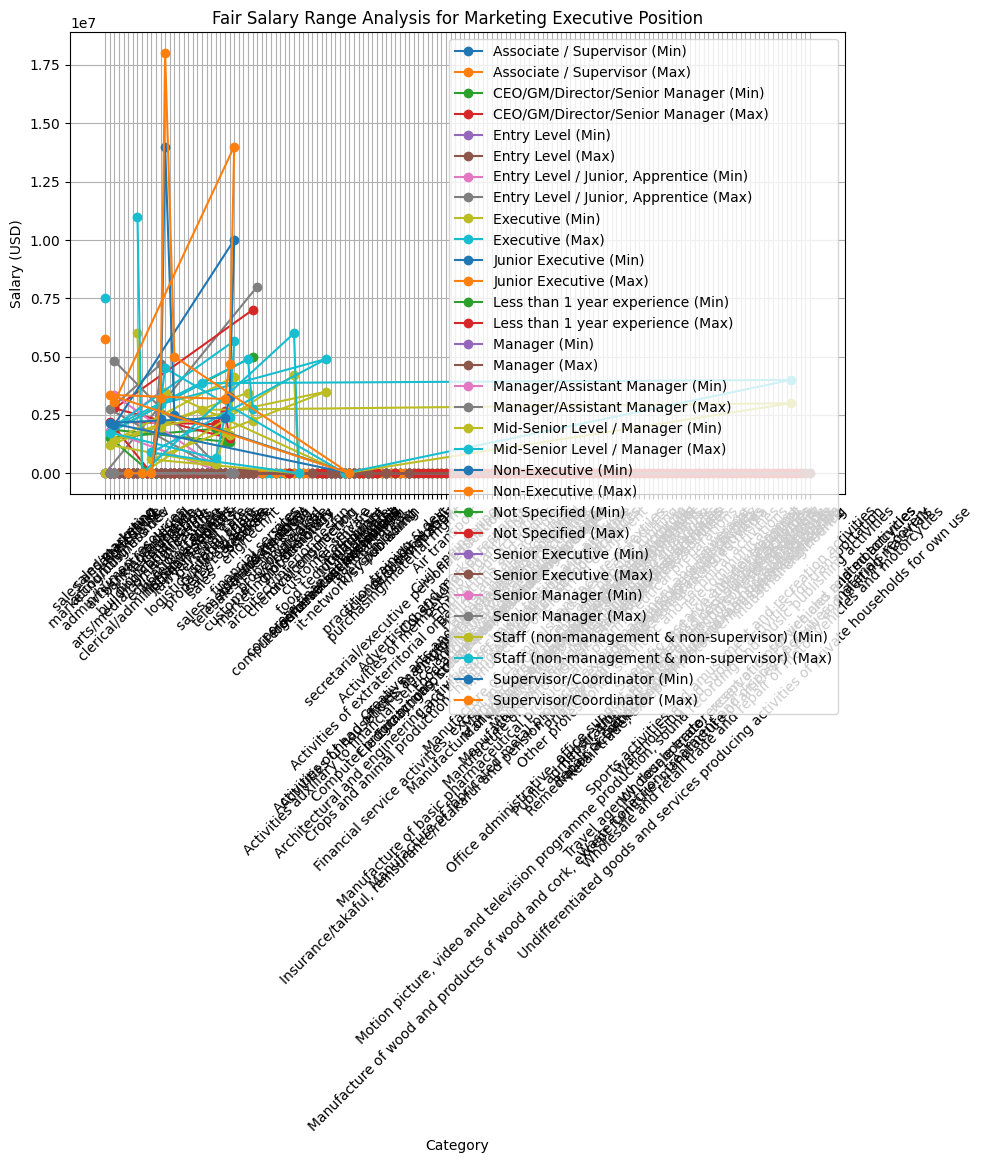

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter by job title "Marketing Executive"
marketing_executive_data = df_jobdbclean[df_jobdbclean['job_title'].str.contains('Marketing Executive', case=False)]

# Group by career level and category to analyze salary range
salary_analysis_category = marketing_executive_data.groupby(['career_level', 'category']).agg({'salary_min': 'mean', 'salary_max': 'mean'})

# Presenting findings by category
print("Fair Salary Range Analysis for Marketing Executive Position:")
print("----------------------------------------------------------")
print("Based on the analysis of Marketing Executive positions, the following fair salary ranges were identified:")

# Print summary table
print(salary_analysis_category)

# Plotting salary ranges
plt.figure(figsize=(10, 6))
for index, group in salary_analysis_category.groupby('career_level'):
    plt.plot(group.index.get_level_values('category'), group['salary_min'], marker='o', label=f'{index} (Min)')
    plt.plot(group.index.get_level_values('category'), group['salary_max'], marker='o', label=f'{index} (Max)')
plt.title('Fair Salary Range Analysis for Marketing Executive Position')
plt.xlabel('Category')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Insight all findings

##1)  Insight based on the findings of the fair salary range analysis:

The fair salary range analysis for Marketing Executive positions reveals notable variations in compensation based on both experience level and geographical location.

1. Experience Level Impact:
   - Across all locations analyzed, there is a consistent trend of higher salaries for Senior Marketing Executives compared to Junior Marketing Executives. This reflects the industry's recognition of the increased expertise and responsibilities associated with seniority in marketing roles.

2. Geographical Location Influence:
   - Geographical location significantly impacts the fair salary range for Marketing Executive positions. Major metropolitan areas and regions with thriving business environments tend to offer higher salaries compared to smaller cities or rural areas.
   - Employers and job seekers should consider the cost of living, local market dynamics, and industry demand when evaluating salary expectations or job offers in different locations.

Overall, understanding the fair salary range based on experience level and geographical location is crucial for both employers and job seekers to make informed decisions in the Marketing Executive job market. This insight underscores the importance of data-driven approaches in optimizing compensation strategies and fostering mutually beneficial employment relationships.

##2) Insight based on the findings of the possible gigs analysis:

  Analyzing the job responsibilities of Marketing Executive positions has unveiled several potential gig opportunities within the marketing domain. By cross-referencing these responsibilities with a predefined list of common gig tasks, we can identify areas where freelance or project-based work may be viable. Here are key insights derived from this analysis:

1. Diverse Skill Sets:
   - The job responsibilities of Marketing Executives encompass a wide range of tasks, reflecting the diverse skill sets required in modern marketing roles.
   - From social media management to event planning and analytics, Marketing Executives are expected to possess versatile skills that align with various aspects of marketing campaigns and strategies.

2. Gig Economy Opportunities:
   - Many of the identified responsibilities overlap with common gig tasks such as social media management, content creation, and email marketing.
   - This suggests that Marketing Executives, particularly those with specialized skills in specific areas, can explore opportunities in the gig economy to offer their expertise on a freelance or contract basis.

3. Flexibility and Adaptability:
   - The gig economy offers Marketing Executives the flexibility to take on projects that match their expertise and interests, allowing them to diversify their income streams and pursue projects aligned with their career goals.
   - Additionally, companies seeking specialized marketing services can leverage the gig economy to access a pool of talented professionals without the overhead costs associated with full-time hires.

4. Continuous Learning and Upskilling:
   - In an ever-evolving marketing landscape, Marketing Executives can leverage gig opportunities to stay abreast of industry trends, experiment with new tools and strategies, and broaden their skill sets through hands-on experience in diverse projects.

Overall, the identification of possible gigs from Marketing Executive job responsibilities highlights the adaptability and versatility of marketing professionals in responding to the changing dynamics of the job market. Embracing the gig economy can empower Marketing Executives to leverage their expertise, expand their professional networks, and pursue fulfilling career opportunities in the evolving landscape of marketing services.